# IMPORTING 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from pandas import DataFrame, Series

# READING CSV FILE  &  MERGING THEM

In [3]:
purc = pd.read_csv('purchase.csv') # file is in the current directory I am working.
# TO check current directory use 'pwd'
purc.head(6) # Displaing top 6 data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget


In [4]:
trans = pd.read_csv('transaction.csv')
trans.head(6)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [6]:
merged = pd.merge(trans,purc,on='LYLTY_CARD_NBR') # Merging two data frame on key LYLTY_CARD_NBR

In [7]:
merged.head(6)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
5,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget


# DESCRIBING DATASET AND CHECKING NULL VALUES

In [8]:
merged.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [9]:
merged.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
merged.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# CHECKING DATA COLUMN BY COLUMN 

In [11]:
merged['DATE'].head(6)

0    43390
1    43599
2    43414
3    43533
4    43605
5    43329
Name: DATE, dtype: int64

In [12]:
merged['DATE']= pd.to_datetime(merged['DATE'],errors = 'coerce',unit='d',origin ='1900-01-01')#Chaning datetime to proper format

In [13]:
merged['DATE'].head(3)
merged['DATE'].describe()

<ipython-input-13-9b300eb00603>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged['DATE'].describe()


count                  264836
unique                    364
top       2018-12-26 00:00:00
freq                      939
first     2018-07-03 00:00:00
last      2019-07-02 00:00:00
Name: DATE, dtype: object

In [14]:
merged['STORE_NBR'].unique()

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12

In [15]:
merged['STORE_NBR'].describe()

count    264836.00000
mean        135.08011
std          76.78418
min           1.00000
25%          70.00000
50%         130.00000
75%         203.00000
max         272.00000
Name: STORE_NBR, dtype: float64

In [19]:
merged['LYLTY_CARD_NBR'].unique()

array([  1000,   1307,   1343, ..., 272358, 272379, 272380], dtype=int64)

In [20]:
merged['TXN_ID'].unique()

array([     1,    348,    346, ..., 270187, 270188, 270189], dtype=int64)

In [21]:
merged.TXN_ID.duplicated().sum() # Checking number of duplicate transcation  number

1709

In [22]:
merged['PROD_NBR'].unique()

array([  5,  66,  96,  54,  61,  69, 108,  57,  70,  60,   4,  51,  16,
        46, 112,  87,  24,  59,  93,  28,  42,  13,  84,  83,  44,  52,
        90, 104, 114,  68,  78,  33,  15,  92,  53,  30,  97,  47,   7,
        31,  32,  58,  10,  94,  98, 107,  80,  56,  91,  43,  34,  21,
        41,  81,  99,  25,   1,  38,  11, 101,  65, 111, 113,  39,  63,
       106,  89,  27, 110,   2,  26,  20,  64,  62,  22,  45, 102,  73,
        48,  37,  36,  88, 109,  17, 103,  77,  74,   3,  75,  82,  35,
        19,  40,  76,   9,  49,  23,  67, 100,  79,  71,   6,  85,  29,
        12,  95,  86,   8,  50, 105,  14,  55,  72,  18], dtype=int64)

In [23]:
merged['PROD_NAME'].unique() # Consist of Brand Name, flavor and size of packet 

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

In [25]:
# Remove the Salsa Product
merged = merged[~merged['PROD_NAME'].str.contains(r"[Ss]alsa")]


In [26]:
merged.info() # Total Number of Column reduced 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246742 non-null  datetime64[ns]
 1   STORE_NBR         246742 non-null  int64         
 2   LYLTY_CARD_NBR    246742 non-null  int64         
 3   TXN_ID            246742 non-null  int64         
 4   PROD_NBR          246742 non-null  int64         
 5   PROD_NAME         246742 non-null  object        
 6   PROD_QTY          246742 non-null  int64         
 7   TOT_SALES         246742 non-null  float64       
 8   LIFESTAGE         246742 non-null  object        
 9   PREMIUM_CUSTOMER  246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.7+ MB


In [28]:
# Create a new column with Product Brand
merged['BRAND_NAME']= merged['PROD_NAME'].str.split().str[0]

In [29]:
merged['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Tyrrells', 'Dorito',
       'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red', 'GrnWves',
       'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'RRD', 'Infzns',
       'Burger', 'NCC', 'Cheezels', 'Smith', 'French', 'Sunbites',
       'Cheetos', 'Woolworths', 'Snbts'], dtype=object)

In [31]:
# There are some products with multiple name. Combining them

merged['BRAND_NAME'].replace({"WW":"Woolworths","NCC":"Natural","RRD":"Red",
                            "GrnWves":"Grain","Dorito":"Doritos","Infzns":"Infuzions",
                            "Snbts":"Sunbites","Smith":"Smiths"},inplace=True)

In [32]:
merged['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Woolworths', 'Smiths', 'Kettle', 'Tyrrells',
       'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red', 'Tostitos',
       'Pringles', 'Cobs', 'Twisties', 'Burger', 'Cheezels', 'French',
       'Sunbites', 'Cheetos'], dtype=object)

In [36]:
# Create a new column with product Size
merged['PACT_SIZE'] = merged['PROD_NAME'].str.extract('(\d+)') #EXtracting a digit from the string

In [37]:
merged['PACT_SIZE'].unique()

array(['175', '160', '170', '150', '165', '380', '330', '110', '210',
       '180', '200', '134', '270', '220', '125', '70', '135', '250', '90',
       '190'], dtype=object)

In [38]:
merged['PROD_QTY'].unique()

array([  2,   3,   1,   5,   4, 200], dtype=int64)

In [39]:
merged['TOT_SALES'].unique()

array([  6.  ,   6.3 ,   3.8 ,   2.1 ,   2.9 ,  15.  ,  13.8 ,   8.4 ,
         9.2 ,  13.  ,   8.8 ,   5.7 ,  10.8 ,   7.6 ,   3.6 ,   7.8 ,
         6.6 ,   3.9 ,   5.4 ,   6.2 ,   7.2 ,   7.4 ,  23.  ,   1.7 ,
         3.3 ,  11.4 ,   2.7 ,   3.  ,   5.2 ,   4.2 ,   4.8 ,   1.9 ,
         4.6 ,   3.7 ,   5.8 ,  14.8 ,   4.4 ,   2.6 ,   3.25,   3.4 ,
        15.5 ,   6.5 ,   4.3 ,  28.5 ,   5.6 ,  11.8 ,   8.6 ,  19.  ,
        17.6 ,   9.  ,  13.2 ,  15.2 ,  14.5 ,  10.4 ,  16.5 ,   1.8 ,
         5.9 ,  18.4 ,  18.5 ,   2.8 ,   2.3 ,   3.1 ,   2.4 ,  15.6 ,
        19.5 ,  27.  ,   9.9 ,  16.2 ,  13.5 ,  21.6 ,  23.6 ,  29.5 ,
        12.6 ,   8.1 ,  11.1 ,  22.  ,   9.5 ,  16.25,  11.7 ,  22.8 ,
         9.6 ,   8.5 ,  10.5 ,  21.  ,  12.  ,  14.4 ,   5.1 ,   9.75,
        16.8 ,  17.7 ,  17.2 ,  17.1 ,   6.8 ,  18.  ,  12.9 ,  11.5 ,
         8.7 ,  14.  ,  11.6 ,  12.4 , 650.  ,  21.5 ,   9.3 ,  11.2 ,
         6.9 ])

<AxesSubplot:xlabel='PROD_QTY'>

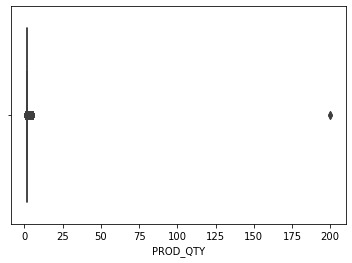

In [41]:
sns.boxplot(merged['PROD_QTY'])

In [43]:
merged.sort_values(by="PROD_QTY",ascending = False) # Checking for extreme value

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,PACT_SIZE
71457,2019-05-22,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,380
71456,2018-08-21,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,Doritos,380
171902,2018-08-21,23,23102,19371,26,Pringles Sweet&Spcy BBQ 134g,5,18.5,RETIREES,Premium,Pringles,134
151907,2019-05-22,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,RETIREES,Mainstream,Smiths,380
17163,2019-05-18,57,57237,52658,82,Smith Crinkle Cut Mac N Cheese 150g,5,13.0,MIDAGE SINGLES/COUPLES,Premium,Smiths,150
...,...,...,...,...,...,...,...,...,...,...,...,...
172394,2018-08-22,81,81050,79953,32,Kettle Sea Salt And Vinegar 175g,1,5.4,RETIREES,Premium,Kettle,175
23238,2018-12-04,195,195044,194875,4,Dorito Corn Chp Supreme 380g,1,6.5,MIDAGE SINGLES/COUPLES,Premium,Doritos,380
23239,2019-06-11,195,195044,194876,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,MIDAGE SINGLES/COUPLES,Premium,Smiths,175
23240,2019-06-19,195,195193,195048,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,MIDAGE SINGLES/COUPLES,Premium,Infuzions,110


In [44]:
merged = merged[merged['PROD_QTY']<10]  # Removing OutLier

In [45]:
merged['TOT_SALES'].unique()

array([ 6.  ,  6.3 ,  3.8 ,  2.1 ,  2.9 , 15.  , 13.8 ,  8.4 ,  9.2 ,
       13.  ,  8.8 ,  5.7 , 10.8 ,  7.6 ,  3.6 ,  7.8 ,  6.6 ,  3.9 ,
        5.4 ,  6.2 ,  7.2 ,  7.4 , 23.  ,  1.7 ,  3.3 , 11.4 ,  2.7 ,
        3.  ,  5.2 ,  4.2 ,  4.8 ,  1.9 ,  4.6 ,  3.7 ,  5.8 , 14.8 ,
        4.4 ,  2.6 ,  3.25,  3.4 , 15.5 ,  6.5 ,  4.3 , 28.5 ,  5.6 ,
       11.8 ,  8.6 , 19.  , 17.6 ,  9.  , 13.2 , 15.2 , 14.5 , 10.4 ,
       16.5 ,  1.8 ,  5.9 , 18.4 , 18.5 ,  2.8 ,  2.3 ,  3.1 ,  2.4 ,
       15.6 , 19.5 , 27.  ,  9.9 , 16.2 , 13.5 , 21.6 , 23.6 , 29.5 ,
       12.6 ,  8.1 , 11.1 , 22.  ,  9.5 , 16.25, 11.7 , 22.8 ,  9.6 ,
        8.5 , 10.5 , 21.  , 12.  , 14.4 ,  5.1 ,  9.75, 16.8 , 17.7 ,
       17.2 , 17.1 ,  6.8 , 18.  , 12.9 , 11.5 ,  8.7 , 14.  , 11.6 ,
       12.4 , 21.5 ,  9.3 , 11.2 ,  6.9 ])

C:\Users\Jatin Takyar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_SALES'>

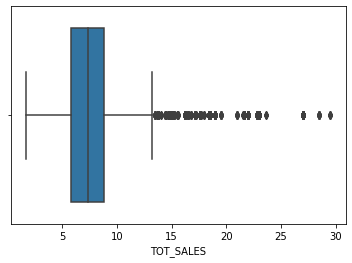

In [46]:
sns.boxplot(merged['TOT_SALES'])  # TO Check if any Outlier

In [47]:
merged['PREMIUM_CUSTOMER'].unique()  # Checking Unique values in premium customer

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [48]:
merged['LIFESTAGE'].unique() # Checking unique values in LIFESTAGE

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

# ANALYTICS

Number of Customer in each segment

In [322]:
purc['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0.5, 1.0, 'Distribution of Customer Type')

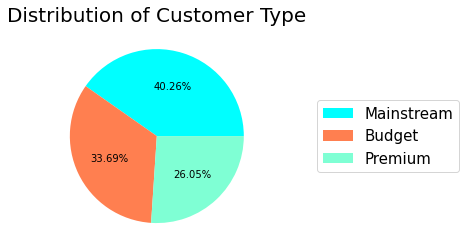

In [338]:
plt.pie(purc['PREMIUM_CUSTOMER'].value_counts(),colors=['cyan','coral','aquamarine'],
       
       autopct='%.2f%%')

plt.legend(purc["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15,bbox_to_anchor=(1.2,0.7))
plt.title("Distribution of Customer Type", fontsize=20)

In [339]:
purc['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Text(0.5, 1.0, 'Distribution of Customer based on LIFESTAGE')

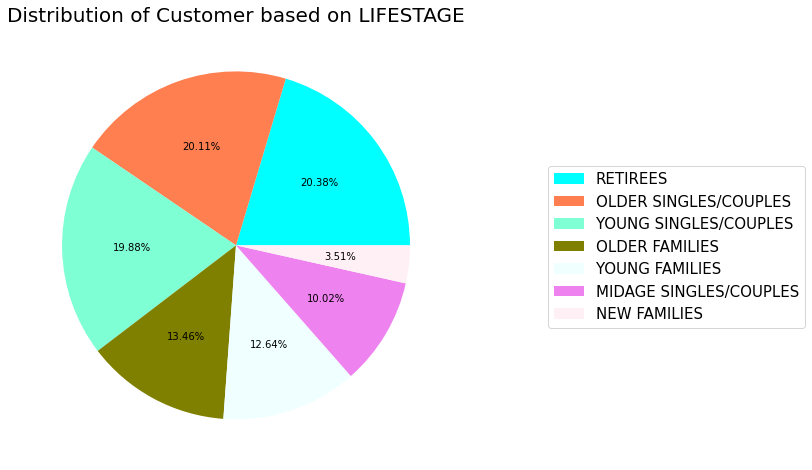

In [344]:
plt.figure(figsize=(8,8))
plt.pie(purc['LIFESTAGE'].value_counts(),colors=['cyan','coral','aquamarine','olive',
                                              'azure','violet','lavenderblush'],
       autopct='%.2f%%')
plt.legend(purc["LIFESTAGE"].value_counts().index, fontsize=15,bbox_to_anchor=(1.2,0.7))
plt.title('Distribution of Customer based on LIFESTAGE',fontsize=20)


# NUMBER OF CUSTOMER OF EACH SEGMENT

In [348]:
cus1 = pd.DataFrame(purc.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).count())

In [349]:
cus1.columns = ['Count']

In [350]:
cus1

Count
LIFESTAGE              PREMIUM_CUSTOMER       
MIDAGE SINGLES/COUPLES Budget             1504
                       Mainstream         3340
                       Premium            2431
NEW FAMILIES           Budget             1112
                       Mainstream          849
                       Premium             588
OLDER FAMILIES         Budget             4675
                       Mainstream         2831
                       Premium            2274
OLDER SINGLES/COUPLES  Budget             4929
                       Mainstream         4930
                       Premium            4750
RETIREES               Budget             4454
                       Mainstream         6479
                       Premium            3872
YOUNG FAMILIES         Budget             4017
                       Mainstream         2728
                       Premium            2433
YOUNG SINGLES/COUPLES  Budget             3779
                       Mainstream         8088
                       Premium            2574

Text(0, 0.5, 'Count of Customer')

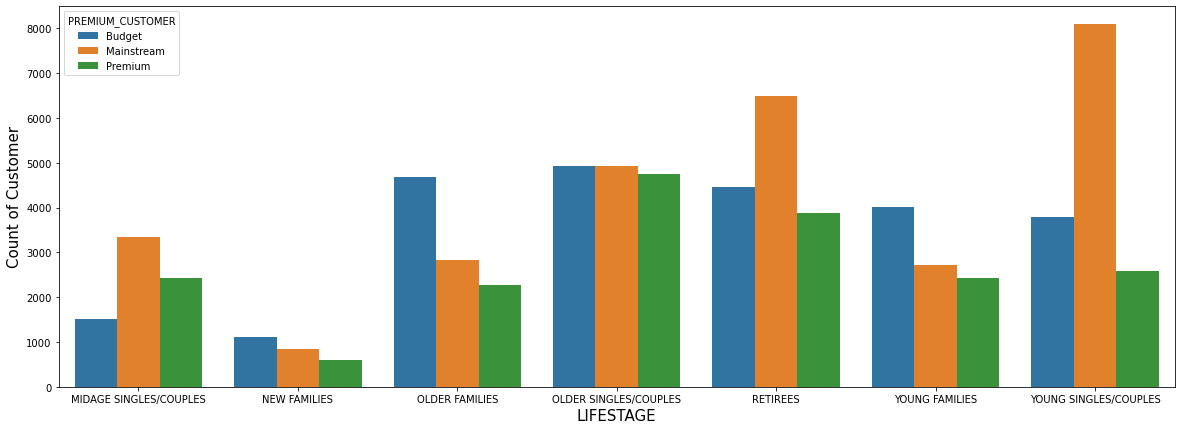

In [355]:
plt.figure(figsize=(20,7))

sns.barplot(x=cus1.reset_index()['LIFESTAGE'],y=cus1.reset_index()['Count'],hue=
           cus1.reset_index()['PREMIUM_CUSTOMER'])
plt.xlabel("LIFESTAGE",fontsize=15)
plt.ylabel("Count of Customer",fontsize=15)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                      1474
                       Mainstream                  3298
                       Premium                     2369
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575
OLDER FAMILIES         Budget                      4611
                       Mainstream                  2788
                       Premium                     2231
OLDER SINGLES/COUPLES  Budget                      4849
                       Mainstream                  4858
                       Premium                     4682
RETIREES               Budget                      4385
                       Mainstream                  6358
                       Premium                     3812
YOUNG FAMILIES         Budget                      3953
                       Mainstream                  2685
                       Premium                     2398
YOUNG SINGLES/COUPLES  Budget                      3647
                       Mainstream                  7917
                       Premium                     2480

In [ ]:
plt.figure(fusize=(10,7))
sns.barplot(x=cus_life.reset_index()['LIFESTAGE'],y=cus_life)

<AxesSubplot:xlabel='LIFESTAGE,PREMIUM_CUSTOMER', ylabel='Number of Customers'>

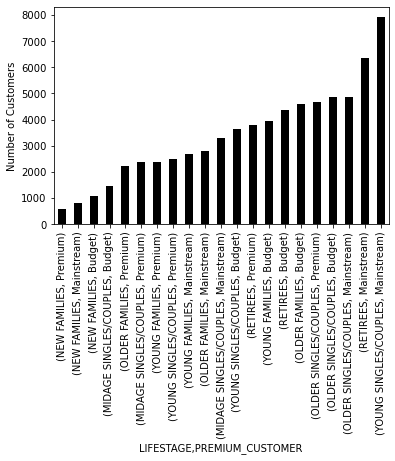

In [119]:
cus_life.nunique().sort_values().plot(kind='bar', color= 'black',ylabel = 'Number of Customers')

# Finding out top 5 products used by brand name for Premium Customer

Premium
Kettle      10711
Smiths       8044
Pringles     6579
Doritos      6392
Red          4427
Name: BRAND_NAME, dtype: int64


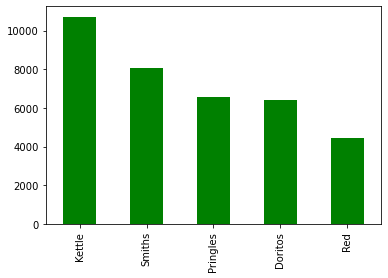

Budget
Kettle      14154
Smiths      11008
Doritos      8718
Pringles     8620
Red          5970
Name: BRAND_NAME, dtype: int64


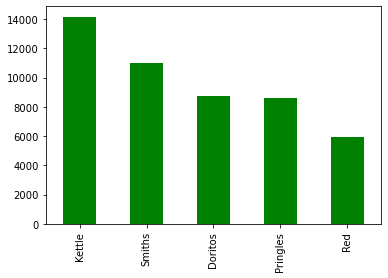

Mainstream
Kettle      16423
Smiths      11301
Doritos     10114
Pringles     9903
Red          5924
Name: BRAND_NAME, dtype: int64


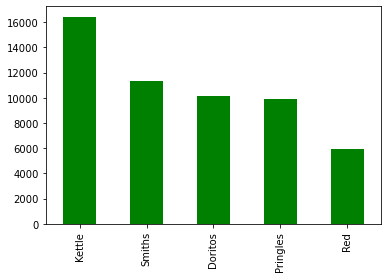

In [86]:
# Finding out top 5 products used by brand name for Premium Customer

for cus in merged['PREMIUM_CUSTOMER'].unique():
    total = merged[merged['PREMIUM_CUSTOMER']==cus]['BRAND_NAME'].value_counts().head(5)
    print(cus)
    print(total)
    total.plot(kind='bar',color='green')
    plt.show()

# Finding out top 5 products used by brand name for lifestage 

YOUNG SINGLES/COUPLES
Kettle       5893
Smiths       3893
Pringles     3684
Doritos      3650
Infuzions    2013
Name: BRAND_NAME, dtype: int64


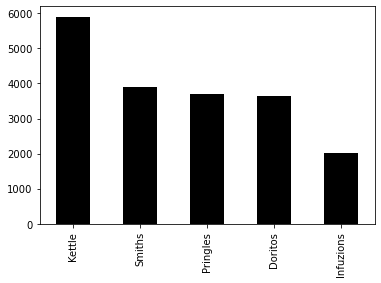

MIDAGE SINGLES/COUPLES
Kettle      4055
Smiths      2790
Doritos     2423
Pringles    2389
Red         1478
Name: BRAND_NAME, dtype: int64


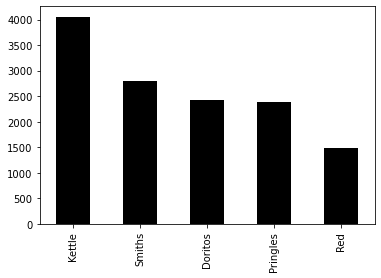

NEW FAMILIES
Kettle       1171
Smiths        727
Doritos       726
Pringles      698
Infuzions     393
Name: BRAND_NAME, dtype: int64


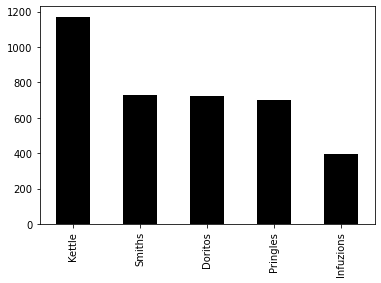

OLDER FAMILIES
Kettle      6851
Smiths      6138
Pringles    4244
Doritos     4218
Red         3593
Name: BRAND_NAME, dtype: int64


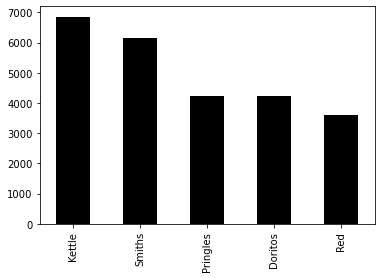

OLDER SINGLES/COUPLES
Kettle      8847
Smiths      6032
Doritos     5326
Pringles    5307
Red         3042
Name: BRAND_NAME, dtype: int64


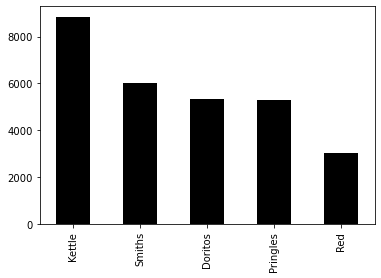

RETIREES
Kettle      8194
Smiths      5374
Doritos     4987
Pringles    4951
Thins       2792
Name: BRAND_NAME, dtype: int64


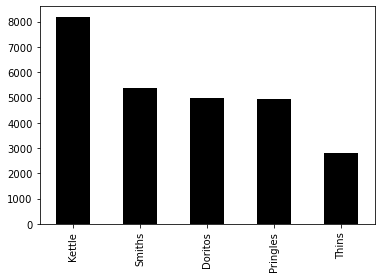

YOUNG FAMILIES
Kettle      6277
Smiths      5399
Doritos     3894
Pringles    3829
Red         3129
Name: BRAND_NAME, dtype: int64


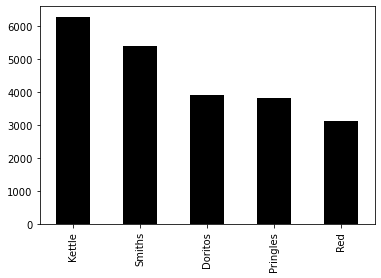

In [87]:
# Finding out top 5 products used by brand name for lifestage

for cus in merged['LIFESTAGE'].unique():
    total = merged[merged['LIFESTAGE']==cus]['BRAND_NAME'].value_counts().head(5)
    print(cus)
    print(total)
    total.plot(kind='bar',color='black')
    plt.show()

# Finding out top 5 products used by brand name for Premium Customer and lifestage

YOUNG SINGLES/COUPLES Premium
Kettle      838
Smiths      787
Pringles    537
Doritos     489
Red         454
Name: BRAND_NAME, dtype: int64


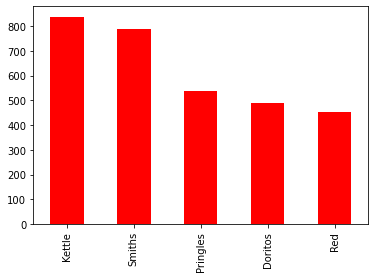

YOUNG SINGLES/COUPLES Budget
Kettle      1211
Smiths      1185
Pringles     832
Doritos      782
Red          679
Name: BRAND_NAME, dtype: int64


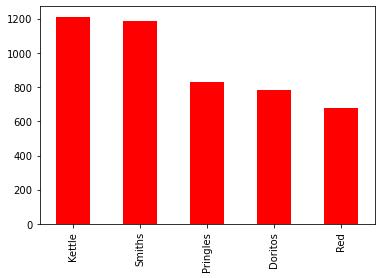

YOUNG SINGLES/COUPLES Mainstream
Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: BRAND_NAME, dtype: int64


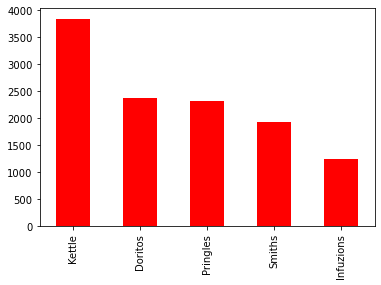

MIDAGE SINGLES/COUPLES Premium
Kettle      1206
Smiths       923
Pringles     781
Doritos      734
Red          533
Name: BRAND_NAME, dtype: int64


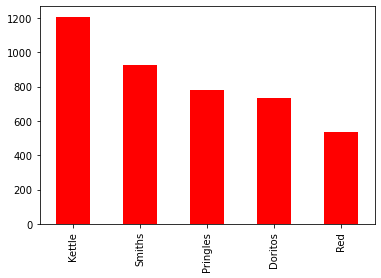

MIDAGE SINGLES/COUPLES Budget
Kettle      713
Smiths      591
Doritos     479
Pringles    449
Red         334
Name: BRAND_NAME, dtype: int64


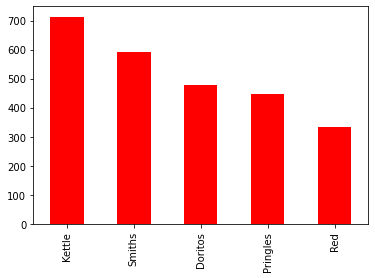

MIDAGE SINGLES/COUPLES Mainstream
Kettle       2136
Smiths       1276
Doritos      1210
Pringles     1159
Infuzions     679
Name: BRAND_NAME, dtype: int64


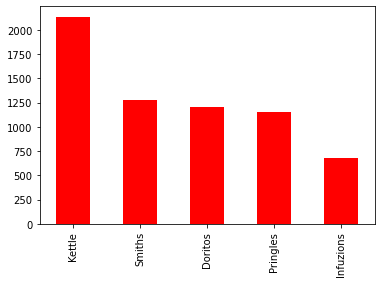

NEW FAMILIES Premium
Kettle       247
Pringles     165
Smiths       155
Doritos      154
Infuzions     87
Name: BRAND_NAME, dtype: int64


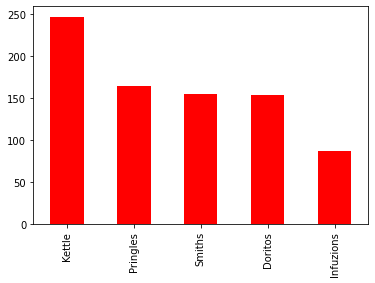

NEW FAMILIES Budget
Kettle       510
Smiths       328
Doritos      315
Pringles     309
Infuzions    180
Name: BRAND_NAME, dtype: int64


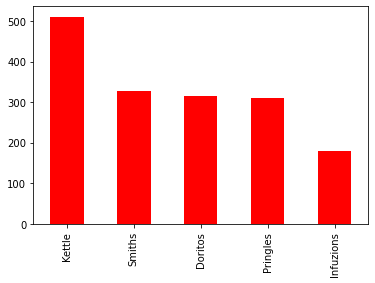

NEW FAMILIES Mainstream
Kettle      414
Doritos     257
Smiths      244
Pringles    224
Red         134
Name: BRAND_NAME, dtype: int64


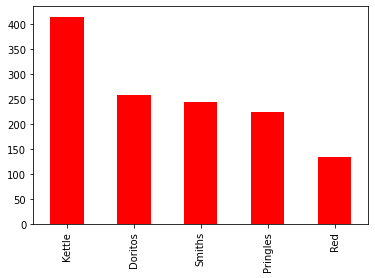

OLDER FAMILIES Premium
Kettle      1512
Smiths      1448
Pringles    1014
Doritos      923
Red          838
Name: BRAND_NAME, dtype: int64


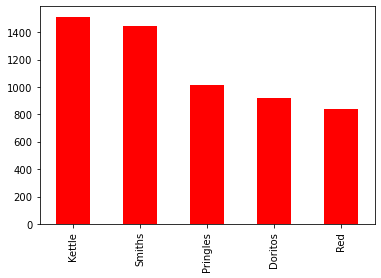

OLDER FAMILIES Budget
Kettle      3320
Smiths      2948
Doritos     2032
Pringles    1996
Red         1708
Name: BRAND_NAME, dtype: int64


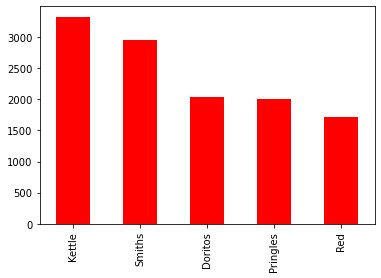

OLDER FAMILIES Mainstream
Kettle      2019
Smiths      1742
Doritos     1263
Pringles    1234
Red         1047
Name: BRAND_NAME, dtype: int64


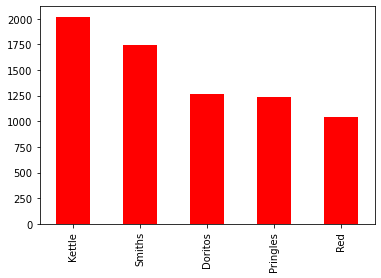

OLDER SINGLES/COUPLES Premium
Kettle      2947
Smiths      1952
Doritos     1784
Pringles    1744
Thins        997
Name: BRAND_NAME, dtype: int64


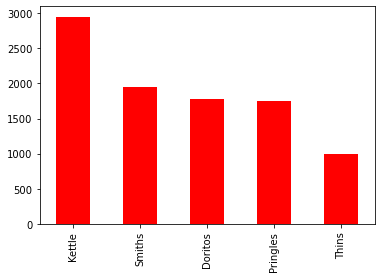

OLDER SINGLES/COUPLES Budget
Kettle       3065
Smiths       2010
Pringles     1843
Doritos      1751
Infuzions    1043
Name: BRAND_NAME, dtype: int64


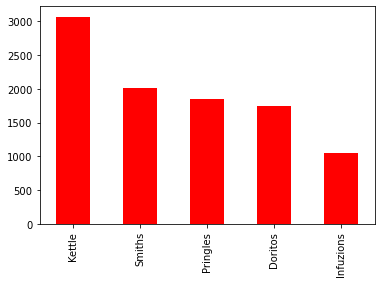

OLDER SINGLES/COUPLES Mainstream
Kettle      2835
Smiths      2070
Doritos     1791
Pringles    1720
Red         1112
Name: BRAND_NAME, dtype: int64


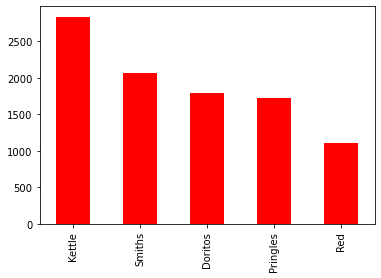

RETIREES Premium
Kettle       2216
Smiths       1395
Pringles     1331
Doritos      1306
Infuzions     758
Name: BRAND_NAME, dtype: int64


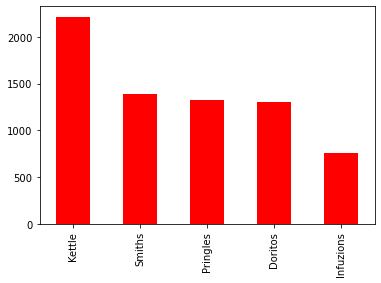

RETIREES Budget
Kettle      2592
Smiths      1612
Doritos     1592
Pringles    1517
Thins        866
Name: BRAND_NAME, dtype: int64


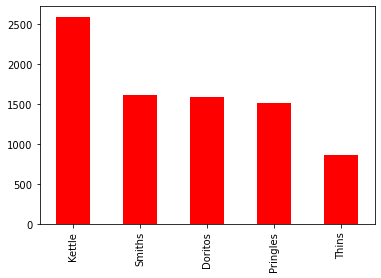

RETIREES Mainstream
Kettle      3386
Smiths      2367
Pringles    2103
Doritos     2089
Red         1223
Name: BRAND_NAME, dtype: int64


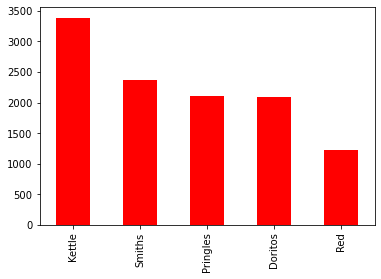

YOUNG FAMILIES Premium
Kettle      1745
Smiths      1384
Pringles    1007
Doritos     1002
Red          860
Name: BRAND_NAME, dtype: int64


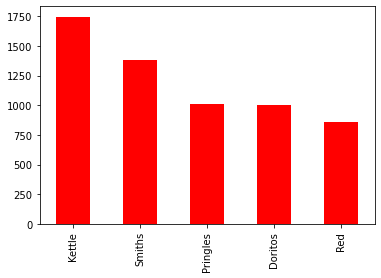

YOUNG FAMILIES Budget
Kettle      2743
Smiths      2334
Doritos     1767
Pringles    1674
Red         1347
Name: BRAND_NAME, dtype: int64


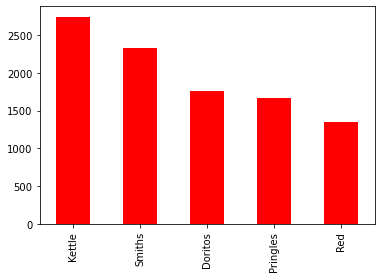

YOUNG FAMILIES Mainstream
Kettle      1789
Smiths      1681
Pringles    1148
Doritos     1125
Red          922
Name: BRAND_NAME, dtype: int64


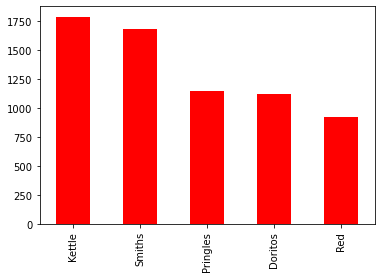

In [88]:
# Finding out top 5 products used by brand name for Premium Customer and lifestage
for cus in merged['LIFESTAGE'].unique():
    for cus1 in merged['PREMIUM_CUSTOMER'].unique():
        
        total = merged[(merged['LIFESTAGE']==cus) & (merged['PREMIUM_CUSTOMER']==cus1)]['BRAND_NAME'].value_counts().head(5)
        print(cus,cus1)
        print(total)
        total.plot(kind='bar',color='red')
        plt.show()

YOUNG SINGLES/COUPLES Premium
175    1618
150     933
134     537
110     499
170     452
Name: PACT_SIZE, dtype: int64


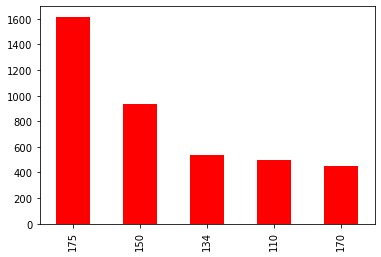

YOUNG SINGLES/COUPLES Budget
175    2338
150    1390
134     832
170     724
110     677
Name: PACT_SIZE, dtype: int64


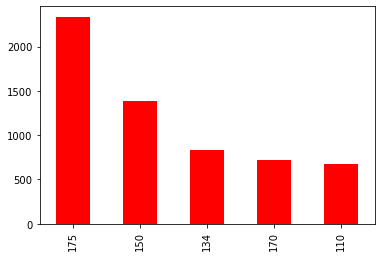

YOUNG SINGLES/COUPLES Mainstream
175    4997
150    3080
134    2315
110    2051
170    1575
Name: PACT_SIZE, dtype: int64


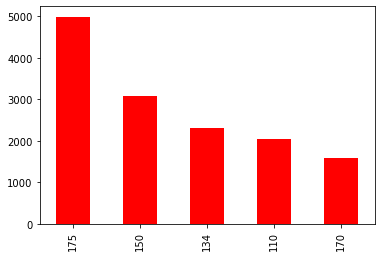

MIDAGE SINGLES/COUPLES Premium
175    2082
150    1207
134     781
110     665
170     583
Name: PACT_SIZE, dtype: int64


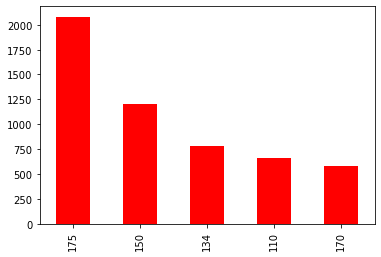

MIDAGE SINGLES/COUPLES Budget
175    1277
150     771
134     449
110     434
170     370
Name: PACT_SIZE, dtype: int64


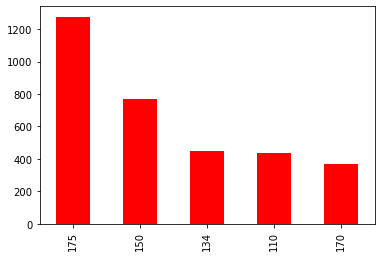

MIDAGE SINGLES/COUPLES Mainstream
175    2975
150    1777
134    1159
110    1124
170     882
Name: PACT_SIZE, dtype: int64


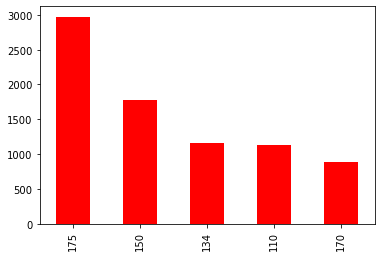

NEW FAMILIES Premium
175    376
150    233
134    165
110    148
170    113
Name: PACT_SIZE, dtype: int64


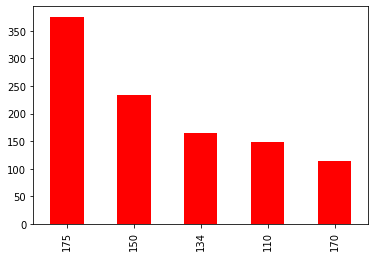

NEW FAMILIES Budget
175    777
150    440
134    309
110    291
170    239
Name: PACT_SIZE, dtype: int64


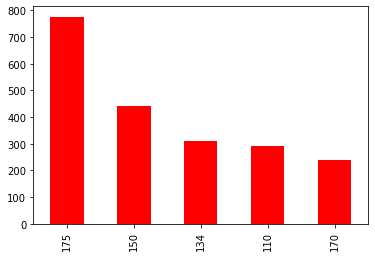

NEW FAMILIES Mainstream
175    589
150    374
134    224
110    214
170    169
Name: PACT_SIZE, dtype: int64


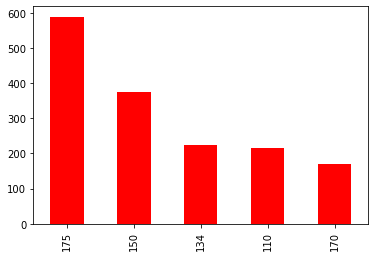

OLDER FAMILIES Premium
175    2816
150    1673
134    1014
110     875
170     825
Name: PACT_SIZE, dtype: int64


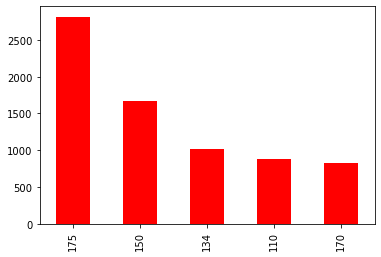

OLDER FAMILIES Budget
175    5808
150    3588
134    1996
110    1803
170    1786
Name: PACT_SIZE, dtype: int64


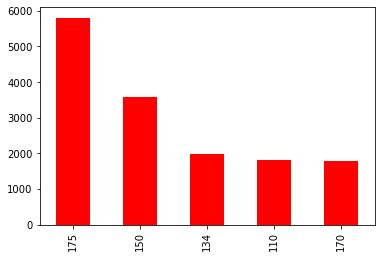

OLDER FAMILIES Mainstream
175    3588
150    2189
134    1234
110    1131
170    1073
Name: PACT_SIZE, dtype: int64


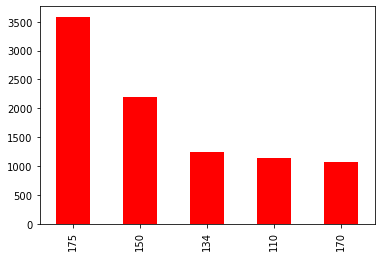

OLDER SINGLES/COUPLES Premium
175    4458
150    2768
134    1744
110    1504
170    1324
Name: PACT_SIZE, dtype: int64


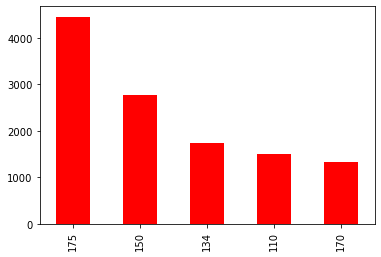

OLDER SINGLES/COUPLES Budget
175    4625
150    2811
134    1843
110    1629
170    1321
Name: PACT_SIZE, dtype: int64


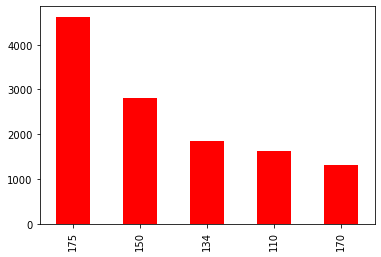

OLDER SINGLES/COUPLES Mainstream
175    4525
150    2773
134    1720
110    1557
170    1433
Name: PACT_SIZE, dtype: int64


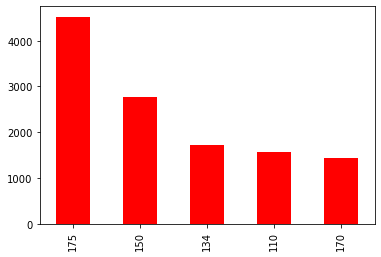

RETIREES Premium
175    3306
150    1943
134    1331
110    1193
170     959
Name: PACT_SIZE, dtype: int64


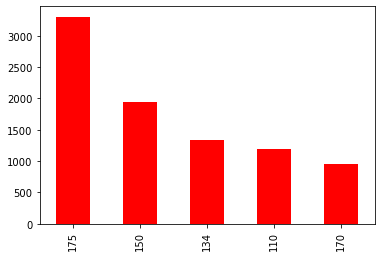

RETIREES Budget
175    3847
150    2319
134    1517
110    1318
170    1169
Name: PACT_SIZE, dtype: int64


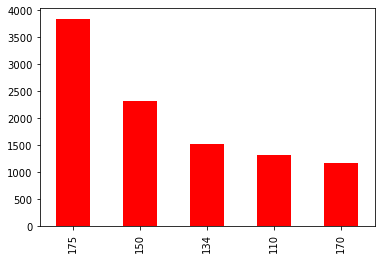

RETIREES Mainstream
175    5295
150    3290
134    2103
110    1829
170    1636
Name: PACT_SIZE, dtype: int64


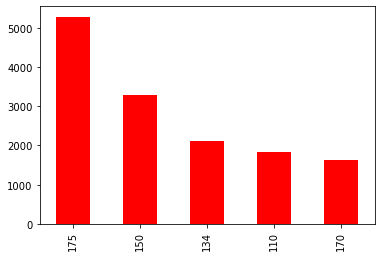

YOUNG FAMILIES Premium
175    2998
150    1778
134    1007
110     947
170     850
Name: PACT_SIZE, dtype: int64


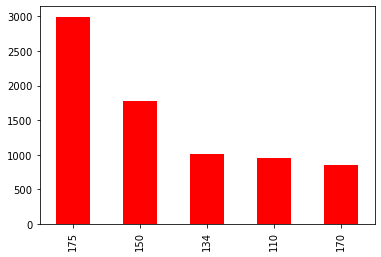

YOUNG FAMILIES Budget
175    4921
150    2862
134    1674
110    1488
170    1484
Name: PACT_SIZE, dtype: int64


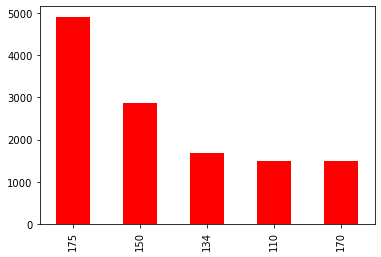

YOUNG FAMILIES Mainstream
175    3174
150    2004
134    1148
170    1016
110    1010
Name: PACT_SIZE, dtype: int64


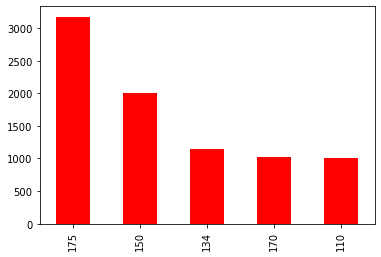

In [137]:
for life in merged['LIFESTAGE'].unique():
    for pre in merged['PREMIUM_CUSTOMER'].unique():
        
        total = merged[(merged['LIFESTAGE']==life) & (merged['PREMIUM_CUSTOMER']==pre)]['PACT_SIZE'].value_counts().head(5)
        print(life,pre)
        print(total)
        total.plot(kind='bar',color='red')
        plt.show()

# TOTAL SALES OF EACH SEGMENT

In [123]:
cus = merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES']
 #Total sales of customer groupby lifestage and Premium Customer

In [125]:
cus = cus.agg(['sum'])

In [126]:
cus = pd.DataFrame(cus) #Converting Series to DataFRame

In [358]:
cus

sum
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

<AxesSubplot:xlabel='LIFESTAGE', ylabel='sum'>

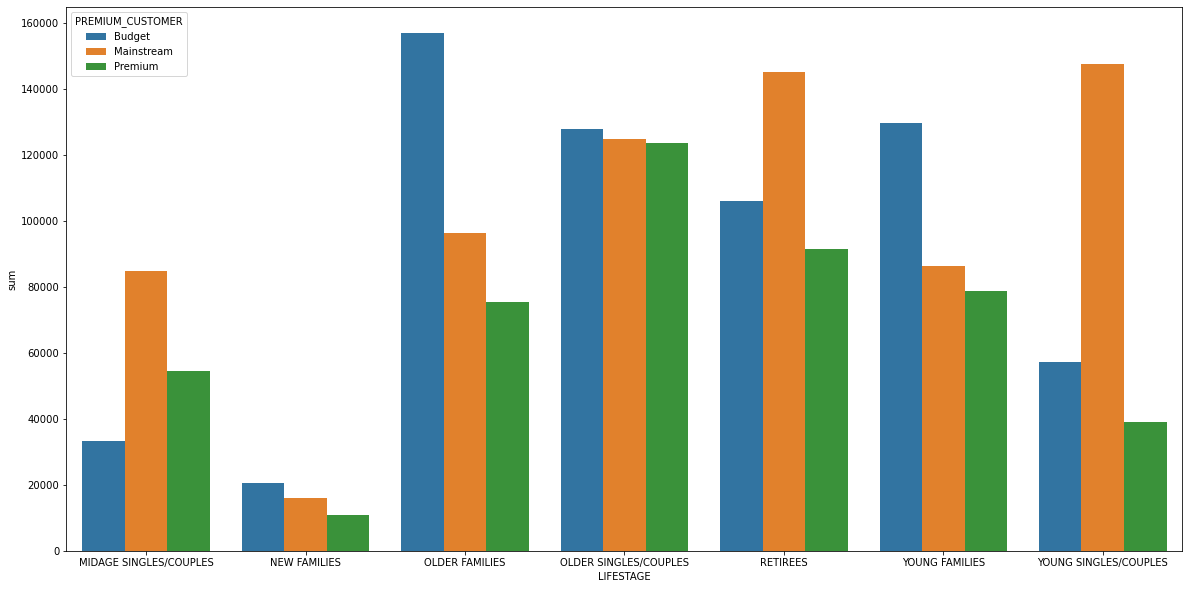

In [201]:
plt.figure(figsize=(20,10))
sns.barplot(y=cus.reset_index()['sum'],x=cus.reset_index()['LIFESTAGE'],hue=cus.reset_index()['PREMIUM_CUSTOMER'])

# TOTAL COUNT OF EACH PACKET SIZE

In [231]:
a = merged.groupby(['PACT_SIZE']).size()

<AxesSubplot:xlabel='PACT_SIZE'>

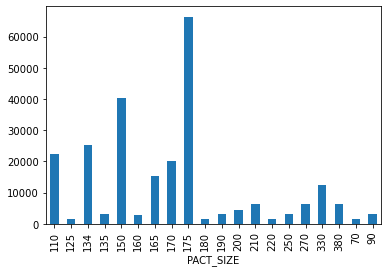

In [233]:
a.plot(kind='bar')

# TOTAL SIZE OF EACH PREMIUM CUSTOMER

In [235]:
total_sales_by_pre = merged.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

In [237]:
total_sales_by_pre =pd.DataFrame(total_sales_by_pre)

In [238]:
total_sales_by_pre

,TOT_SALES
PREMIUM_CUSTOMER,
Budget,631406.85
Mainstream,700865.40
Premium,472905.45


<AxesSubplot:xlabel='Premium', ylabel='TOTAL_SALES'>

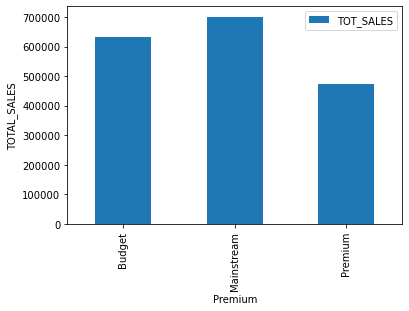

In [248]:
total_sales_by_pre.plot(kind='bar',xlabel='Premium',ylabel='TOTAL_SALES')

# AVERAGE SALES QUANTITY

In [250]:
avg_sal = merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

In [251]:
avg_sal.columns = ['Sales_QTY']

In [253]:
avg_sal = pd.DataFrame(avg_sal)

In [254]:
avg_sal

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
MIDAGE SINGLES/COUPLES Budget                8883
                       Mainstream           21213
                       Premium              14400
NEW FAMILIES           Budget                5241
                       Mainstream            4060
                       Premium               2769
OLDER FAMILIES         Budget               41853
                       Mainstream           25804
                       Premium              20239
OLDER SINGLES/COUPLES  Budget               32883
                       Mainstream           32607
                       Premium              31695
RETIREES               Budget               26932
                       Mainstream           37677
                       Premium              23266
YOUNG FAMILIES         Budget               34482
                       Mainstream           23194
                       Premium              20901
YOUNG SINGLES/COUPLES  Budget               15500
                       Mainstream           36225
                       Premium              10575

In [273]:
merge = pd.merge(avg_sal,cus_life,on=['LIFESTAGE','PREMIUM_CUSTOMER'])

In [277]:
merge =merge.rename(columns={'LYLTY_CARD_NBR':'Customer_count'})

In [278]:
merge

PROD_QTY  Customer_count
LIFESTAGE              PREMIUM_CUSTOMER                          
MIDAGE SINGLES/COUPLES Budget                8883            1474
                       Mainstream           21213            3298
                       Premium              14400            2369
NEW FAMILIES           Budget                5241            1087
                       Mainstream            4060             830
                       Premium               2769             575
OLDER FAMILIES         Budget               41853            4611
                       Mainstream           25804            2788
                       Premium              20239            2231
OLDER SINGLES/COUPLES  Budget               32883            4849
                       Mainstream           32607            4858
                       Premium              31695            4682
RETIREES               Budget               26932            4385
                       Mainstream           37677            6358
                       Premium              23266            3812
YOUNG FAMILIES         Budget               34482            3953
                       Mainstream           23194            2685
                       Premium              20901            2398
YOUNG SINGLES/COUPLES  Budget               15500            3647
                       Mainstream           36225            7917
                       Premium              10575            2480

In [279]:
merge['avg_sal_Qty'] = merge['PROD_QTY']/merge['Customer_count']

In [280]:
merge

PROD_QTY  Customer_count  avg_sal_Qty
LIFESTAGE              PREMIUM_CUSTOMER                                       
MIDAGE SINGLES/COUPLES Budget                8883            1474     6.026459
                       Mainstream           21213            3298     6.432080
                       Premium              14400            2369     6.078514
NEW FAMILIES           Budget                5241            1087     4.821527
                       Mainstream            4060             830     4.891566
                       Premium               2769             575     4.815652
OLDER FAMILIES         Budget               41853            4611     9.076773
                       Mainstream           25804            2788     9.255380
                       Premium              20239            2231     9.071717
OLDER SINGLES/COUPLES  Budget               32883            4849     6.781398
                       Mainstream           32607            4858     6.712021
                       Premium              31695            4682     6.769543
RETIREES               Budget               26932            4385     6.141847
                       Mainstream           37677            6358     5.925920
                       Premium              23266            3812     6.103358
YOUNG FAMILIES         Budget               34482            3953     8.722995
                       Mainstream           23194            2685     8.638361
                       Premium              20901            2398     8.716013
YOUNG SINGLES/COUPLES  Budget               15500            3647     4.250069
                       Mainstream           36225            7917     4.575597
                       Premium              10575            2480     4.264113

Text(0, 0.5, 'Average Sales Quantity')

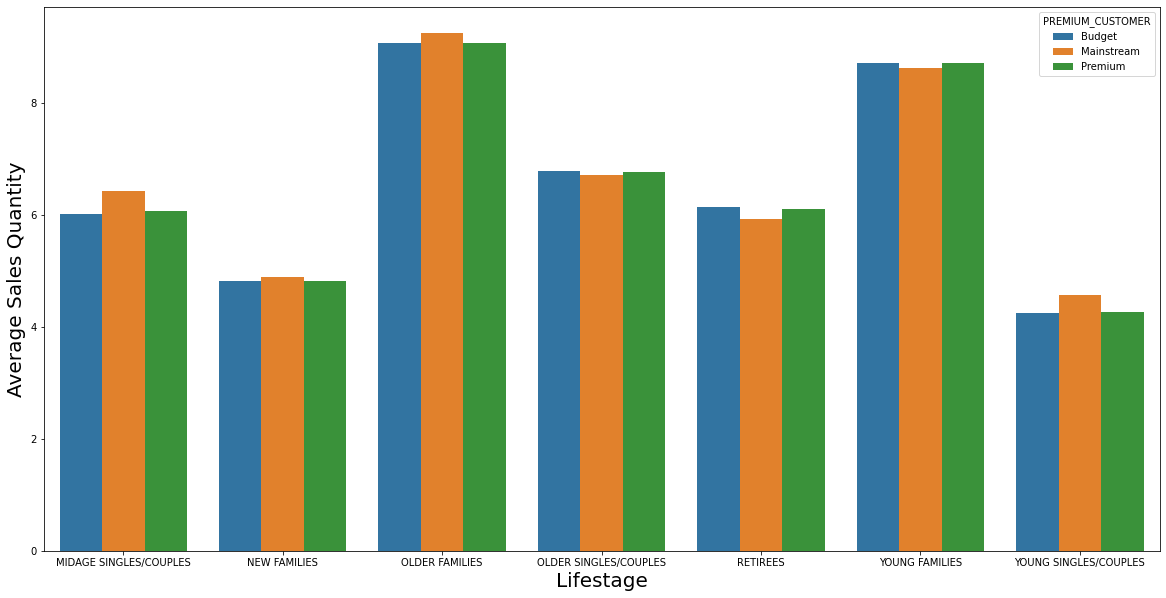

In [359]:
plt.figure(figsize=(20,10))
sns.barplot(y=merge.reset_index()['avg_sal_Qty'],x=merge.reset_index()['LIFESTAGE'],hue=merge.reset_index()['PREMIUM_CUSTOMER'])
plt.xlabel('Lifestage',fontsize=20)
plt.ylabel('Average Sales Quantity',fontsize = 20)

# AVERAGE SALES PRICE

In [288]:
merge1 = pd.merge(merge,cus,on=['LIFESTAGE','PREMIUM_CUSTOMER'])

In [289]:
merge1

PROD_QTY  Customer_count  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget                8883            1474   
                       Mainstream           21213            3298   
                       Premium              14400            2369   
NEW FAMILIES           Budget                5241            1087   
                       Mainstream            4060             830   
                       Premium               2769             575   
OLDER FAMILIES         Budget               41853            4611   
                       Mainstream           25804            2788   
                       Premium              20239            2231   
OLDER SINGLES/COUPLES  Budget               32883            4849   
                       Mainstream           32607            4858   
                       Premium              31695            4682   
RETIREES               Budget               26932            4385   
                       Mainstream           37677            6358   
                       Premium              23266            3812   
YOUNG FAMILIES         Budget               34482            3953   
                       Mainstream           23194            2685   
                       Premium              20901            2398   
YOUNG SINGLES/COUPLES  Budget               15500            3647   
                       Mainstream           36225            7917   
                       Premium              10575            2480   

                                         avg_sal_Qty        sum  
LIFESTAGE              PREMIUM_CUSTOMER                          
MIDAGE SINGLES/COUPLES Budget               6.026459   33345.70  
                       Mainstream           6.432080   84734.25  
                       Premium              6.078514   54443.85  
NEW FAMILIES           Budget               4.821527   20607.45  
                       Mainstream           4.891566   15979.70  
                       Premium              4.815652   10760.80  
OLDER FAMILIES         Budget               9.076773  156863.75  
                       Mainstream           9.255380   96413.55  
                       Premium              9.071717   75242.60  
OLDER SINGLES/COUPLES  Budget               6.781398  127833.60  
                       Mainstream           6.712021  124648.50  
                       Premium              6.769543  123537.55  
RETIREES               Budget               6.141847  105916.30  
                       Mainstream           5.925920  145168.95  
                       Premium              6.103358   91296.65  
YOUNG FAMILIES         Budget               8.722995  129717.95  
                       Mainstream           8.638361   86338.25  
                       Premium              8.716013   78571.70  
YOUNG SINGLES/COUPLES  Budget               4.250069   57122.10  
                       Mainstream           4.575597  147582.20  
                       Premium              4.264113   39052.30

In [291]:
merge1 = merge1.rename(columns={'sum':'Total_Sales'})

In [292]:
merge1

PROD_QTY  Customer_count  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget                8883            1474   
                       Mainstream           21213            3298   
                       Premium              14400            2369   
NEW FAMILIES           Budget                5241            1087   
                       Mainstream            4060             830   
                       Premium               2769             575   
OLDER FAMILIES         Budget               41853            4611   
                       Mainstream           25804            2788   
                       Premium              20239            2231   
OLDER SINGLES/COUPLES  Budget               32883            4849   
                       Mainstream           32607            4858   
                       Premium              31695            4682   
RETIREES               Budget               26932            4385   
                       Mainstream           37677            6358   
                       Premium              23266            3812   
YOUNG FAMILIES         Budget               34482            3953   
                       Mainstream           23194            2685   
                       Premium              20901            2398   
YOUNG SINGLES/COUPLES  Budget               15500            3647   
                       Mainstream           36225            7917   
                       Premium              10575            2480   

                                         avg_sal_Qty  Total_Sales  
LIFESTAGE              PREMIUM_CUSTOMER                            
MIDAGE SINGLES/COUPLES Budget               6.026459     33345.70  
                       Mainstream           6.432080     84734.25  
                       Premium              6.078514     54443.85  
NEW FAMILIES           Budget               4.821527     20607.45  
                       Mainstream           4.891566     15979.70  
                       Premium              4.815652     10760.80  
OLDER FAMILIES         Budget               9.076773    156863.75  
                       Mainstream           9.255380     96413.55  
                       Premium              9.071717     75242.60  
OLDER SINGLES/COUPLES  Budget               6.781398    127833.60  
                       Mainstream           6.712021    124648.50  
                       Premium              6.769543    123537.55  
RETIREES               Budget               6.141847    105916.30  
                       Mainstream           5.925920    145168.95  
                       Premium              6.103358     91296.65  
YOUNG FAMILIES         Budget               8.722995    129717.95  
                       Mainstream           8.638361     86338.25  
                       Premium              8.716013     78571.70  
YOUNG SINGLES/COUPLES  Budget               4.250069     57122.10  
                       Mainstream           4.575597    147582.20  
                       Premium              4.264113     39052.30

In [293]:
merge1['avg_sale_price'] = merge1['Total_Sales']/merge1['PROD_QTY'] 

In [294]:
merge1

PROD_QTY  Customer_count  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget                8883            1474   
                       Mainstream           21213            3298   
                       Premium              14400            2369   
NEW FAMILIES           Budget                5241            1087   
                       Mainstream            4060             830   
                       Premium               2769             575   
OLDER FAMILIES         Budget               41853            4611   
                       Mainstream           25804            2788   
                       Premium              20239            2231   
OLDER SINGLES/COUPLES  Budget               32883            4849   
                       Mainstream           32607            4858   
                       Premium              31695            4682   
RETIREES               Budget               26932            4385   
                       Mainstream           37677            6358   
                       Premium              23266            3812   
YOUNG FAMILIES         Budget               34482            3953   
                       Mainstream           23194            2685   
                       Premium              20901            2398   
YOUNG SINGLES/COUPLES  Budget               15500            3647   
                       Mainstream           36225            7917   
                       Premium              10575            2480   

                                         avg_sal_Qty  Total_Sales  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget               6.026459     33345.70   
                       Mainstream           6.432080     84734.25   
                       Premium              6.078514     54443.85   
NEW FAMILIES           Budget               4.821527     20607.45   
                       Mainstream           4.891566     15979.70   
                       Premium              4.815652     10760.80   
OLDER FAMILIES         Budget               9.076773    156863.75   
                       Mainstream           9.255380     96413.55   
                       Premium              9.071717     75242.60   
OLDER SINGLES/COUPLES  Budget               6.781398    127833.60   
                       Mainstream           6.712021    124648.50   
                       Premium              6.769543    123537.55   
RETIREES               Budget               6.141847    105916.30   
                       Mainstream           5.925920    145168.95   
                       Premium              6.103358     91296.65   
YOUNG FAMILIES         Budget               8.722995    129717.95   
                       Mainstream           8.638361     86338.25   
                       Premium              8.716013     78571.70   
YOUNG SINGLES/COUPLES  Budget               4.250069     57122.10   
                       Mainstream           4.575597    147582.20   
                       Premium              4.264113     39052.30   

                                         avg_sale_price  
LIFESTAGE              PREMIUM_CUSTOMER                  
MIDAGE SINGLES/COUPLES Budget                  3.753878  
                       Mainstream              3.994449  
                       Premium                 3.780823  
NEW FAMILIES           Budget                  3.931969  
                       Mainstream              3.935887  
                       Premium                 3.886168  
OLDER FAMILIES         Budget                  3.747969  
                       Mainstream              3.736380  
                       Premium                 3.717703  
OLDER SINGLES/COUPLES  Budget                  3.887529  
                       Mainstream              3.822753  
                       Premium                 3.897698  
RETIREES               Budget                  3.9327

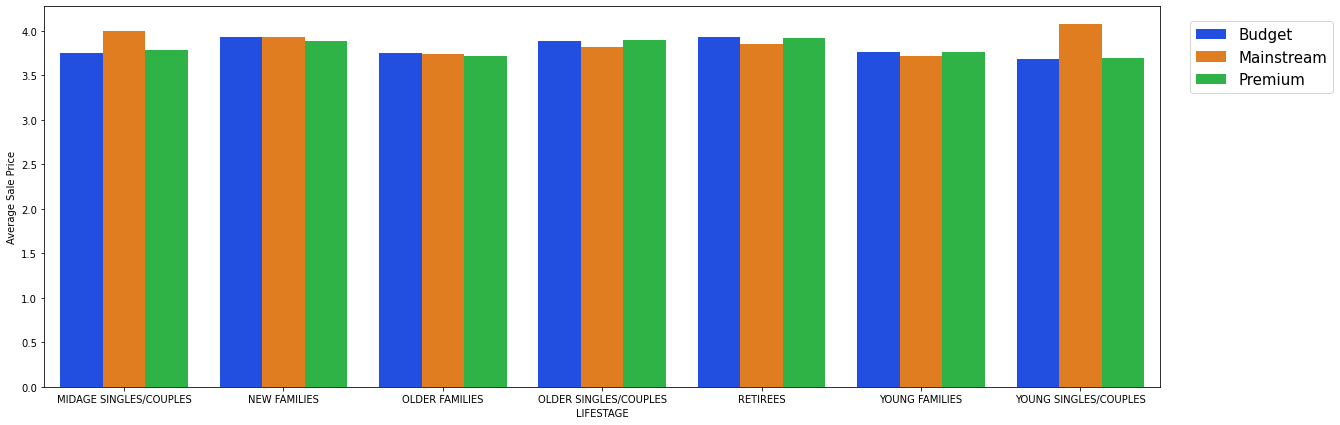

In [345]:
plt.figure(figsize=(20,7))
sns.barplot(x = merge1.reset_index()['LIFESTAGE'],y=merge1.reset_index()['avg_sale_price'],hue=merge1.reset_index()['PREMIUM_CUSTOMER'],
           palette=sns.color_palette('bright',3))
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Sale Price')
plt.legend(fontsize=15, bbox_to_anchor=(1.02,0.98))